### Evaluation of the strategy 

In this case we consider the dynamic output of the controlled platoon and compute the indexes of consumption for each strategy. Be sure to have `.csv` created by`platoon-closed.py` before running this notebook. 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
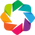

In [27]:
import os
import glob 


from scipy.io import loadmat
from datetime import datetime, timedelta

import pandas as pd
import numpy as np 


from matplotlib import rc 
import matplotlib
import matplotlib.pyplot as plt
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

import holoviews as hv
hv.extension('bokeh')

from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF


Creating file names per variable

In [8]:
N = 4
name_s = glob.glob('../output/space**.csv')
name_v = glob.glob('../output/speed**.csv')
name_u = glob.glob('../output/control**.csv')
name_r = glob.glob('../output/reference**.csv')
name_x = glob.glob('../output/postition**.csv')

Reading into a a single multi indexed dataframe

In [9]:
def read_df_list(files_dist):
    """Read a set of CSV files by variable"""
    truck_list = list(range(N))
    NROW = 550
    df_list = []
    df_info = []
    for name in files_dist:
        s_split = name.split('_')
        truck_id = int(s_split[2])
        s_gap = s_split[-1].split('.csv')
        gap_r = np.round(float(s_gap[0]),2)
        df_info.append((truck_id, gap_r))
        df_list.append(pd.read_csv(name, delimiter='\t', names = truck_list, nrows = NROW))

    full_data = pd.concat(df_list, keys = df_info)
    df = full_data.reset_index()
    
    df.columns = ['Yield','Gap','t']+list(df.columns)[3:]
    df['t'] = df['t'].apply(lambda x: x*0.1)
    df = df.set_index(['Yield','Gap','t'])
    return df 

In [10]:
df_s = read_df_list(name_s)
df_v = read_df_list(name_v)
df_u = read_df_list(name_u)
df_r = read_df_list(name_r)
df_x = read_df_list(name_x)

Brief example of the regulated variables and multiple index slicing 

Text(0.5,1,'Control Spacing policy')

/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font fam

/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font fam

/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font fam

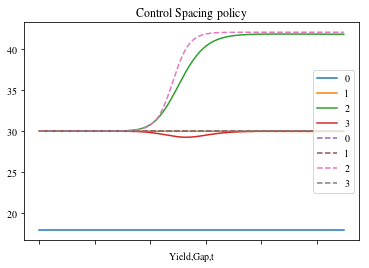

/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font fam

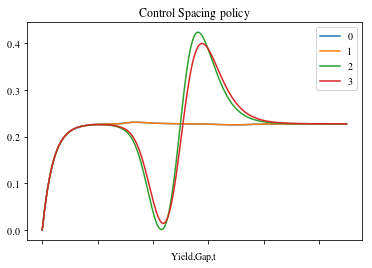

In [11]:
# df_s.index
gap_v = [1.2,
         1.7999999999999998, 
         2.4]

df_s.loc[(2,gap_v[0],slice(None)),:].plot();
ax = plt.gca()
df_r.loc[(2,gap_v[0],slice(None)),:].plot(ax=ax, style = ['--']*4);
plt.title('Control Spacing policy')

df_u.loc[(2,gap_v[0],slice(None)),:].plot();
plt.title('Control Spacing policy')


#### Computing consumption variables 

Puts in a single data frame all required information for consumption 

In [12]:
total_data = pd.concat([df_s,df_v,df_u], axis = 1, keys = ['s','v','u'])
total_data.head()

s                          v                             \
                  0     1     2     3        0        1        2        3   
Yield Gap t                                                                 
1     1.2 0.0  18.0  30.0  30.0  30.0  20.0000  20.0000  20.0000  20.0000   
          0.1  18.0  30.0  30.0  30.0  19.9771  19.9769  19.9769  19.9769   
          0.2  18.0  30.0  30.0  30.0  19.9551  19.9547  19.9547  19.9547   
          0.3  18.0  30.0  30.0  30.0  19.9341  19.9335  19.9335  19.9335   
          0.4  18.0  30.0  30.0  30.0  19.9141  19.9134  19.9134  19.9134   

                    u                          
                    0       1       2       3  
Yield Gap t                                    
1     1.2 0.0 -0.0000 -0.0000 -0.0000 -0.0000  
          0.1  0.0079  0.0080  0.0080  0.0080  
          0.2  0.0186  0.0186  0.0187  0.0187  
          0.3  0.0290  0.0291  0.0292  0.0292  
          0.4  0.0389  0.0390  0.0391  0.0391

#### Coefficients for the fuel consumption 

Loading all data

In [13]:
def load_data():
    """ Returns a data frame extracted from raw data for calibration """
    """ Check notebook 03-Fuel-consumption.ipynb for more details"""

    def transform_date(matlab_datenum):
        """ Convert a date to datetime """
        python_datetime = datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum%1) - timedelta(days = 366)
        return python_datetime    
    
    def compute_acceleration(df):
        """ Compute acceleration"""
        df['TIME'] = df['TIME'].astype('float64')
        num = (df['SPEED']- df['SPEED'].shift(1))/ 3.6 # Delta x
        den = df['TIME']- df['TIME'].shift(1) # Delta t
        df = (num).divide(den)
        return df
    
    data_dir_list = ('..','raw','20160316_061540_DE477VE_Description.mat')
    kernel_path = os.getcwd()
    data_dir_path = os.path.join(kernel_path,*data_dir_list)
    dct_data = loadmat(data_dir_path, matlab_compatible= True, squeeze_me = True)
    
    varname_lst = []    
    for fld in dct_data['DAY'].dtype.fields:
        varname_lst.append(fld)
    
    # Data extraction
    gps_var = ['TIME','DATE_HOUR_GPS', 'SPEED', 'FUEL_FLOW','ALTITUDE','SLOPE']
    lst_gps = [data.transpose()[0].transpose() for var, data in zip(varname_lst, dct_data['DAY'][0][0]) if var in gps_var]
    
    # Cleaning non available rows
    gps_flt = [row for row in zip(*lst_gps) if not np.isnan(row).any()]
    
    # Dataframe
    gps_df = pd.DataFrame(gps_flt, columns = gps_var)
    
    # Units 
    gps_df['SPEED'] = gps_df['SPEED']/3.6 #m/s
    
    # Set date 
    gps_df['SAMPLE_TIME'] = gps_df['DATE_HOUR_GPS'].apply(transform_date)
    
    # Estimate acceleration
    gps_df['ACCELERATION'] = compute_acceleration(gps_df)
    
    # Set index for date
    gps_df_flt = gps_df.set_index('SAMPLE_TIME')
    
    ## Aggregate and drop non computable samples 
    gps_df_agg = gps_df_flt.resample('5Min').mean()
    gps_df_agg = gps_df_agg.dropna()        
    
    # Set columns for fit (See eq. 6)
    data = pd.DataFrame()
    data['x0'] = gps_df_agg['SPEED']**3
    data['x1'] = gps_df_agg['SPEED'].multiply(gps_df_agg['SLOPE'])
    data['x2'] = gps_df_agg['SPEED']
    data['x3'] = gps_df_agg['SPEED'].multiply(gps_df_agg['ACCELERATION'])
    data['x4'] = 1
    
    data['y'] = gps_df_agg['FUEL_FLOW']
    
    return data
    

Load data

In [14]:
data_set = load_data()

Import linear model  

In [15]:
clf = linear_model.LinearRegression()

Fitting the values 

In [16]:
x_col = ['x'+str(i) for i in range(5)]
print(data_set.head())
clf.fit(data_set[x_col], data_set['y'])
beta = clf.coef_
beta

                             x0        x1        x2        x3  x4         y
SAMPLE_TIME                                                                
2016-03-16 06:25:00    1.695715  0.029552  1.192480 -0.006032   1  1.944688
2016-03-16 06:30:00    0.330996 -0.020046  0.691737 -0.000070   1  0.518833
2016-03-16 06:35:00    0.083351  0.000661  0.436821 -0.000550   1  0.444752
2016-03-16 06:40:00   48.960121  0.022074  3.658313  0.050319   1  1.512175
2016-03-16 06:45:00  471.208673 -0.007101  7.781639 -0.091839   1  2.980345


array([-3.56239654e-04,  1.25902945e+01,  4.65829711e-01,  4.61713933e+00,
        0.00000000e+00])

Analyzing quality of the linear regressor

In [17]:
model = sm.OLS(data_set['y'], data_set[x_col])
results_fu = model.fit()
print(results_fu.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     194.1
Date:                Tue, 31 Jul 2018   Prob (F-statistic):           9.35e-47
Time:                        13:39:18   Log-Likelihood:                -158.57
No. Observations:                 107   AIC:                             327.1
Df Residuals:                     102   BIC:                             340.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0            -0.0004    4.8e-05     -7.416      0.0

In [21]:
predicted = results_fu.predict(data_set[x_col])

/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font fam

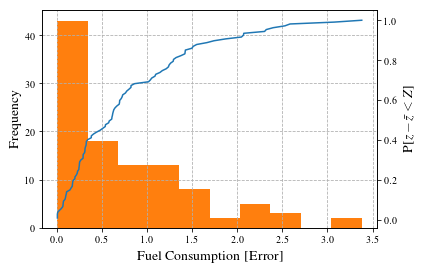

In [74]:
error = (abs(predicted - data_set['y']))
ecdf  = ECDF(error)
# plt.plot(ecdf.x, ecdf.y);
ax1 = plt.axes();
ax2 = ax1.twinx()
ax2.plot(ecdf.x, ecdf.y, color = 'tab:blue');
ax1.set_ylabel('Frequency', fontsize = 14)
ax2.set_ylabel(r'P[$z-\bar{z}<Z$]', fontsize = 14)
ax1.grid(True, linestyle='--')
ax1.hist(error.values, bins =10, color = 'tab:orange');
ax1.set_xlabel('Fuel Consumption [Error]', fontsize = 14)

# plt.xlabel('FC')
# n
plt.savefig('../output/ecdf.pdf',format='pdf', bbox_inches='tight')

#### Estimation of fuel consumption for all scenarios 

In [12]:
def fuel_consumption(df, coef):
    """ Computes the fuel consumption based on spacing information"""
    
    def _cds(s):
        """ Non linear drag coefficient"""
        s[0] = L_AVG  # Accounts for leader not saving
        fCD = (1-np.exp(-2 * s / L_AVG))/2 + 0.42
        return fCD

    data = pd.concat([df['v']**3, 
                     df['v']* 0, 
                     df['v'], 
                     df['v'].multiply(df['u']),
                     df['v'].divide(df['v'])], axis =1)

    x_col = ['x'+str(i) for i in range(5)]
    
    data_fc = []
    for col, b in zip(df, coef):
        data_fc.append(df[col]*b)
     
    fc = pd.concat(data_fc, axis = 1)
    
    return fc.sum(axis=1)
    

In [13]:
def compute_consumption(total_data):
    """Compute consumption for total data"""
    
    select_col = [(slice(None),i) for i in range(N)]
    
    total_consump = []
    
    for veh_col in select_col:
    
        df = total_data.loc[:,veh_col]
    
        consump = fuel_consumption(df, beta)
        
        total_consump.append(consump)
        
    df_consump = pd.concat(total_consump, axis = 1)
    
    
    
    return df_consump

Compute the *fuel consumption* over all vehicles 

In [14]:
fuel_cons = compute_consumption(total_data)

#### Normalized total consumption / per scenario 


Computes cumulated total consumption for each scenario and compares with respect to a non platoon situation. 

In [15]:
fuel_cons_tot =  fuel_cons.sum(axis =1)
fuel_cons_tot.columns = 'FC'

Computes consumption of vehicles not in platoon mood

In [16]:
fuel_not_platoon_tot = fuel_cons[0]*4 # As if 4 vehicles where circulating without platoon 
fuel_not_platoon_tot.columns = 'FC'

Aggregate information by case 

In [17]:
case_platoon_fc = fuel_cons_tot.reset_index().groupby(['Yield','Gap']).sum()
case_not_platoon_fc = fuel_not_platoon_tot.reset_index().groupby(['Yield','Gap']).sum()
case_not_platoon_fc.columns= ['t','FC']
case_not_platoon_fc.head()

t             FC
Yield Gap                        
1     1.2  15097.5  542201.943178
      1.8  15097.5  542311.787170
      2.4  15097.5  542407.281782
2     1.2  15097.5  542199.737178
      1.8  15097.5  542309.822530

In [18]:
case_platoon_fc.columns= ['t','FC']
case_platoon_fc.head()

t             FC
Yield Gap                        
1     1.2  15097.5  537158.063533
      1.8  15097.5  533251.387280
      2.4  15097.5  529402.732480
2     1.2  15097.5  538516.825943
      1.8  15097.5  535948.004720

Comparing two cases:

\begin{align}
\eta \% = 1-\frac{FC_{platoon}}{FC_{regular}}
\end{align}

In [19]:
df_improvement = (1- n_fc['FC']))*100
bars = hv.Bars(df_improvement)

Compare the cases where there is platoon with respect to cases with no platoon and indicate the impact of the strategy

In [20]:
%%opts Bars [width=700, height=400]
bars

:Bars   [Yield,Gap]   (FC)

/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font fam

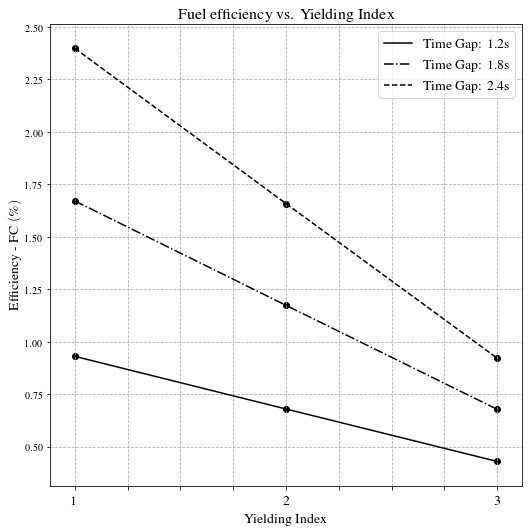

In [23]:
# Export plot 

## CASE 1
gap_fix = 1.2 # case where the gap is 1.2

data_platoon = df_improvement.loc[(slice(None),gap_fix)]
x = data_platoon.index.values
h1 = data_platoon.values 

## CASE 2
gap_fix = 1.8 # case where the gap is 1.8

data_platoon = df_improvement.loc[(slice(None),gap_fix)]
x = data_platoon.index.values
h2 = data_platoon.values 


## CASE 1
gap_fix = 2.4 # case where the gap is 1.8

data_platoon = df_improvement.loc[(slice(None),gap_fix)]
x = data_platoon.index.values
h3 = data_platoon.values 


opacity = 0.4
bar_width = 0.35/2

fig, ax = plt.subplots(figsize=(7.5,7.5))
# ax.bar(x, h2, width = bar_width ,label='Not platoon', 
#        alpha=opacity, color='b')
ax.plot(x, h1, 'k-',label='Time Gap: 1.2s')
ax.plot(x, h2, 'k-.',label='Time Gap: 1.8s')
ax.plot(x, h3, 'k--',label='Time Gap: 2.4s')

ax.scatter(x, h1, c='k')
ax.scatter(x, h2, c='k')
ax.scatter(x, h3, c='k')


ax.set_xlabel('Yielding Index', fontsize = 14)
ax.set_ylabel(f'Efficiency - FC  $(\%)$', fontsize = 14)
ax.grid(True, linestyle='--')
ax.set_title(f'Fuel efficiency vs. Yielding Index ', fontsize = 16)
ax.set_xticklabels(['',  '1'  , '' , '' ,'' ,  '2'  ,'' ,  '',  '', '3' , '' ], fontsize = 14)
ax.legend(fontsize=14)

fig.tight_layout()
plt.savefig('../output/sensibility-fc.pdf',format='pdf', bbox_inches='tight')

### Consumption vs yielding vehicle

Analysis of the consumption normalized to a non-platoon situation 

In [24]:
fuel_cons_platoon = fuel_cons.copy(deep=True)
fuel_cons_not_platoon = fuel_cons.copy(deep=True)
for col in fuel_cons_not_platoon: 
    fuel_cons_not_platoon[col]=fuel_cons_platoon[0] # Every vehicle like a leader (no fuel saving)

Compute total cumulated consumption for each vehicle in the platoon

In [25]:
cum_platoon_yield = fuel_cons_platoon.reset_index().groupby(['Yield','Gap']).sum().cumsum(axis=1)
cum_not_platoon_yield = fuel_cons_not_platoon.reset_index().groupby(['Yield','Gap']).sum().cumsum(axis=1)

cum_platoon_yield = cum_platoon_yield.drop('t',1)
cum_not_platoon_yield = cum_not_platoon_yield.drop('t',1)

# To normalize apply the division per column 
div_col= lambda x,y: np.asarray(x) / np.asarray(y)
col_norm = cum_not_platoon_yield[3] # reference to non platoon case 
norm_cum_platoon_yield = cum_platoon_yield.apply(div_col, y=col_norm) * 100
norm_cum_not_platoon_yield = cum_not_platoon_yield.apply(div_col, y=col_norm) * 100

# Select a simple case (Gap = 2.4)
yield_scenario_platoon = norm_cum_platoon_yield.loc[(slice(None),2.4),:]
yield_scenario_not_platoon = norm_cum_not_platoon_yield.loc[(slice(None),2.4),:]

# Melt data (See pd.melt?) for more info
tidy_scenario_platoon = pd.melt(yield_scenario_platoon.reset_index('Yield'),
                                id_vars=['Yield'], 
                                var_name = 'Id', 
                                value_vars=[0,1,2,3], 
                                value_name = 'FC')

tidy_scenario_not_platoon = pd.melt(yield_scenario_not_platoon.reset_index('Yield'),
                                    id_vars=['Yield'], 
                                    var_name = 'Id', 
                                    value_vars = [0,1,2,3], 
                                    value_name = 'FC')
# Print results 
print(yield_scenario_platoon)
print(yield_scenario_not_platoon)



# Select a simple case (Gap = 1.2)
yield_scenario_platoon = norm_cum_platoon_yield.loc[(slice(None),1.2),:]
yield_scenario_not_platoon = norm_cum_not_platoon_yield.loc[(slice(None),1.2),:]

# Melt data (See pd.melt?) for more info
tidy_scenario_platoon = pd.melt(yield_scenario_platoon.reset_index('Yield'),
                                id_vars=['Yield'], 
                                var_name = 'Id', 
                                value_vars=[0,1,2,3], 
                                value_name = 'FC')

tidy_scenario_not_platoon = pd.melt(yield_scenario_not_platoon.reset_index('Yield'),
                                    id_vars=['Yield'], 
                                    var_name = 'Id', 
                                    value_vars = [0,1,2,3], 
                                    value_name = 'FC')

print(yield_scenario_platoon)
print(yield_scenario_not_platoon)



# Select a simple case (Gap = 1.8)
yield_scenario_platoon = norm_cum_platoon_yield.loc[(slice(None),1.8),:]
yield_scenario_not_platoon = norm_cum_not_platoon_yield.loc[(slice(None),1.8),:]

# Melt data (See pd.melt?) for more info
tidy_scenario_platoon = pd.melt(yield_scenario_platoon.reset_index('Yield'),
                                id_vars=['Yield'], 
                                var_name = 'Id', 
                                value_vars=[0,1,2,3], 
                                value_name = 'FC')

tidy_scenario_not_platoon = pd.melt(yield_scenario_not_platoon.reset_index('Yield'),
                                    id_vars=['Yield'], 
                                    var_name = 'Id', 
                                    value_vars = [0,1,2,3], 
                                    value_name = 'FC')

print(yield_scenario_platoon)
print(yield_scenario_not_platoon)



                   0          1          2          3
Yield Gap                                            
1     2.4  27.031036  50.570306  74.119844  97.667365
2     2.4  27.031046  51.296137  74.836448  98.387015
3     2.4  27.031065  51.296148  75.562292  99.103638
                   0          1          2      3
Yield Gap                                        
1     2.4  27.031036  51.354024  75.677012  100.0
2     2.4  27.031046  51.354031  75.677015  100.0
3     2.4  27.031065  51.354044  75.677022  100.0
                   0          1          2          3
Yield Gap                                            
1     1.2  27.031785  51.049409  75.072178  99.094943
2     1.2  27.031793  51.296661  75.315340  99.339148
3     1.2  27.031795  51.296665  75.562591  99.582317
                   0          1          2      3
Yield Gap                                        
1     1.2  27.031785  51.354523  75.677262  100.0
2     1.2  27.031793  51.354529  75.677264  100.0
3     1.2 

In this case the objective is to study each yielding case and compare how are the equilibrium for each member of the platoon 

/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font fam

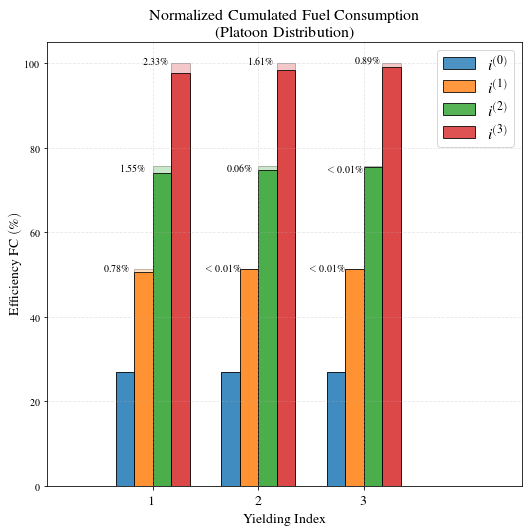

In [41]:
# Due to time constraints we make it in a manual form 

x  = np.array([0, 1, 2])
h1 = [27.031036,  27.031046,  27.031065]#, 27.031036]
h3 = [50.570306,  51.296137,  51.296148]#, 51.354024]
h5 = [74.119844,  74.836448,  75.562292]#, 75.677012]
h7 = [97.667365,  98.387015,  99.103638]#, 100.0]

h2 = [27.031036]*3
h4 = [51.354024]*3
h6 = [75.677012]*3
h8 = [100.0]*3

opacity = 0.25
bar_width = 0.35/2

fig, ax = plt.subplots(figsize=(7.5,7.5))

ax.bar(x-1.5*bar_width, h2, width = bar_width, 
      alpha=opacity, color = 'tab:blue',edgecolor = "k")
ax.bar(x-bar_width/2, h4, width = bar_width, 
      alpha=opacity, color = 'tab:orange',edgecolor = "k")
ax.bar(x+bar_width/2, h6, width = bar_width, 
      alpha=opacity, color = 'tab:green',edgecolor = "k")
ax.bar(x+1.5*bar_width, h8, width = bar_width, 
      alpha=opacity, color = 'tab:red',edgecolor = "k")

opacity = 0.8


# # plt.xlim(-1,4)
# # # ax.bar(x, h2, width = bar_width ,label='Not platoon', 
# # #        alpopacity = 0.35ha=opacity, color='b')
ax.bar(x-1.5*bar_width, h1, width = bar_width,label=r'$i^{(0)}$', 
      alpha=opacity, color = 'tab:blue', edgecolor = "k")
ax.bar(x-bar_width/2, h3, width = bar_width,label=r'$i^{(1)}$', 
      alpha=opacity, color = 'tab:orange', edgecolor = "k")
ax.bar(x+bar_width/2, h5, width = bar_width,label=r'$i^{(2)}$', 
      alpha=opacity, color = 'tab:green', edgecolor = "k")
ax.bar(x+1.5*bar_width, h7, width = bar_width,label=r'$i^{(3)}$', 
      alpha=opacity, color = 'tab:red', edgecolor = "k")

# Annotations 

ax.annotate(r'0.78\%', xy = (x[0]-1.5*bar_width, h3[0]), xytext=(x[0]-1.5*bar_width-0.2, h3[0]+0.2))
ax.annotate(r'1.55\%', xy = (x[0], h5[0]), xytext=(x[0]-0.3, h5[0]+0.3))
ax.annotate(r'2.33\%', xy = (x[0]+1.5*bar_width, h7[0]), xytext=(x[0]+1.5*bar_width-0.35, h7[0]+2.2))


ax.annotate(r'0.06\%', xy = (x[1], h5[0]), xytext=(x[1]-0.3, h5[0]+0.3))
ax.annotate(r'$<0.01$\%', xy = (x[1], h3[0]), xytext=(x[1]-0.5, h3[0]+0.4))
ax.annotate(r'1.61\%', xy = (x[1]+1.5*bar_width, h7[0]), xytext=(x[1]+1.5*bar_width-0.35, h7[0]+2.1))


ax.annotate(r'0.89\%', xy = (x[2]+1.5*bar_width, h7[0]), xytext=(x[2]+1.5*bar_width-0.35, h7[0]+2.1))
ax.annotate(r'$<0.01$\%', xy = (x[2], h3[0]), xytext=(x[2]-0.52, h3[0]+0.4))
ax.annotate(r'$<0.01$\%', xy = (x[2], h5[0]), xytext=(x[2]-0.35, h5[0]+0.3))

ax.set_xlabel('Yielding Index', fontsize = 14)
ax.set_ylabel(f'Efficiency FC  $(\%)$', fontsize = 14)
ax.set_title('Normalized Cumulated Fuel Consumption  \n (Platoon Distribution) ', fontsize = 16)
plt.xlim((-1,3.5))
ax.set_xticks(x)
ax.set_xticklabels(('1', '2', '3'), fontsize = 14)
ax.legend(fontsize=16)
ax.grid(True, linestyle='--', alpha = 0.3)

fig.tight_layout()
plt.savefig('../output/fc-equilibrium.pdf',format='pdf', bbox_inches='tight')

#### Total dynamic consumption (%)

Analyzing the total dynamic consumption for different scenarios 

In [27]:
cons_per_scenario = 100*fuel_cons_tot.divide(fuel_not_platoon_tot)
cons_per_scenario = cons_per_scenario.reset_index()
cons_per_scenario_non = 100*fuel_not_platoon_tot.divide(fuel_not_platoon_tot)

/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font fam

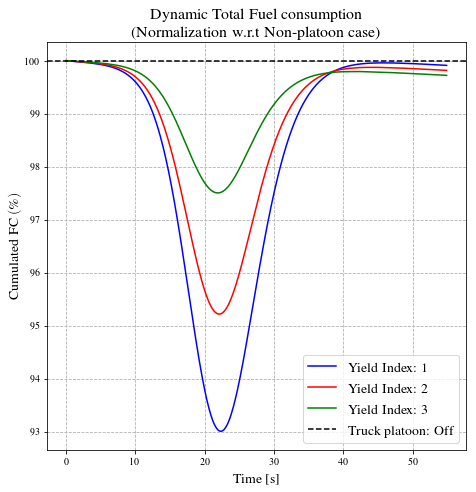

In [28]:
select1 = (cons_per_scenario['Yield']==1) & (cons_per_scenario['Gap']==1.8)
select2 = (cons_per_scenario['Yield']==2) & (cons_per_scenario['Gap']==1.8)
select3 = (cons_per_scenario['Yield']==3) & (cons_per_scenario['Gap']==1.8)

df_case1 = cons_per_scenario[select1]
df_case2 = cons_per_scenario[select2]
df_case3 = cons_per_scenario[select3]

opacity = 0.4


fig, ax = plt.subplots(figsize=(7.5,7.5))

ax.plot(df_case1['t'],df_case1[0],'b',label='Yield Index: 1');
ax.plot(df_case2['t'],df_case2[0],'r',label='Yield Index: 2');
ax.plot(df_case3['t'],df_case3[0],'g',label='Yield Index: 3');
ax.axhline(y=100, xmin=0, xmax=50, color='k', linestyle='--', label = 'Truck platoon: Off ')
ax.legend(fontsize=14)
ax.grid(True, linestyle='--')
ax.set_xlabel('Time [s]',fontsize = 14)
ax.set_ylabel(r'Cumulated FC $(\%)$',fontsize = 14)
ax.set_title('Dynamic Total Fuel consumption \n (Normalization w.r.t Non-platoon case)',fontsize = 16)
plt.savefig('../output/fc-dynamic.pdf',format='pdf', bbox_inches='tight')

#### Dynamic position 

For illustrative purposes on the scenario 

/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ladino/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font fam

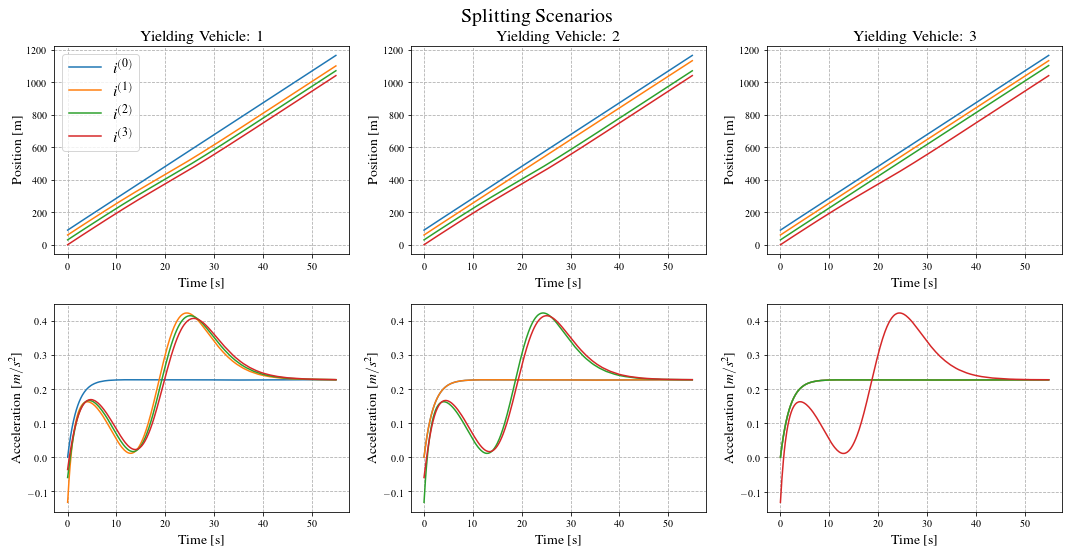

In [31]:
selector1 = (1, 2.4, slice(None))
selector2 = (2, 2.4, slice(None))
selector3 = (3, 2.4, slice(None))

df_case1 = df_x.loc[selector1,:].reset_index()
df_case2 = df_x.loc[selector2,:].reset_index()
df_case3 = df_x.loc[selector3,:].reset_index()

df_case1u = df_u.loc[selector1,:].reset_index()
df_case2u = df_u.loc[selector2,:].reset_index()
df_case3u = df_u.loc[selector3,:].reset_index()


fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(15,7.5))

ax[0][0].plot(df_case1['t'], df_case1[[0,1,2,3]])
ax[0][0].set_xlabel('Time [s]',fontsize = 14);
ax[0][0].set_ylabel('Position [m]',fontsize = 14);
ax[0][0].set_title('Yielding Vehicle: 1',fontsize = 16);
ax[0][0].legend( [r'$i^{(0)}$',r'$i^{(1)}$',r'$i^{(2)}$',r'$i^{(3)}$'], fontsize = 16)
ax[0][0].grid(True, linestyle='--')
ax[0][1].plot(df_case2['t'], df_case2[[0,1,2,3]])
ax[0][1].set_xlabel('Time [s]',fontsize = 14);
ax[0][1].set_ylabel('Position [m]',fontsize = 14);
ax[0][1].set_title('Yielding Vehicle: 2',fontsize = 16);
ax[0][1].grid(True, linestyle='--')
ax[0][2].plot(df_case3['t'], df_case3[[0,1,2,3]])
ax[0][2].set_xlabel('Time [s]',fontsize = 14);
ax[0][2].set_ylabel('Position [m]',fontsize = 14);
ax[0][2].set_title('Yielding Vehicle: 3',fontsize = 16);
ax[0][2].grid(True, linestyle='--')

ax[1][0].plot(df_case1u['t'], df_case1u[[0,1,2,3]])
ax[1][0].set_xlabel('Time [s]',fontsize = 14);
ax[1][0].set_ylabel(f'Acceleration [$m/s^2$]',fontsize = 14);
ax[1][0].grid(True, linestyle='--')
ax[1][1].plot(df_case2u['t'], df_case2u[[0,1,2,3]])
ax[1][1].set_xlabel('Time [s]',fontsize = 14);
ax[1][1].set_ylabel(f'Acceleration [$m/s^2$]',fontsize = 14);
ax[1][1].grid(True, linestyle='--')
ax[1][2].plot(df_case3u['t'], df_case3u[[0,1,2,3]])
ax[1][2].set_xlabel('Time [s]',fontsize = 14);
ax[1][2].set_ylabel(f'Acceleration [$m/s^2$]',fontsize = 14);
ax[1][2].grid(True, linestyle='--')

fig.suptitle('Splitting Scenarios',fontsize = 20, y = 1.02)
fig.tight_layout()
plt.savefig('../output/split-scenarios.pdf',format='pdf', bbox_inches='tight')

In [32]:
selector = (slice(None),0)
x = total_data.loc[:,selector]
x.head()

s        v       u
                  0        0       0
Yield Gap t                         
1     1.2 0.0  18.0  20.0000 -0.0000
          0.1  18.0  19.9771  0.0079
          0.2  18.0  19.9551  0.0186
          0.3  18.0  19.9341  0.0290
          0.4  18.0  19.9141  0.0389

In [ ]:
+6